In [1]:
import numpy as np
import pylcp
import scipy.constants as cts
import matplotlib.pyplot as plt

### Compare uncoupled vs. coupled basis:

First, make the uncoupled basis:

In [2]:
xi = 6701.16;          # fine structure splitting
a_c = -9.5788;           # empirical contact splitting (MHz)
a_orb = 8.6727;          # empirical orbital splitting
a_dip = -1.8964;         # empirical dipole splitting

# all splittings in MHz
gL = 0.9999218;        # orbital g-factor
gS = 2.0023193;        # electron spin g-factor
gI = 2.170903*(5.0507866e-27/9.2740154e-24);  # nuclear spin g-factor

aa = 803.54/2.         # Ground state contact interaction

muB = cts.value('Bohr magneton in Hz/T')*1e-4/1e6

H_e_uncoupled, muq_e_uncoupled, basis_e = pylcp.hamiltonians.fine_structure_uncoupled(
    1, 1/2, 3/2, xi, a_c, a_orb, a_dip, gL, gS, gI, muB, return_basis=True
)
H_g_uncoupled, muq_g_uncoupled, basis_g = pylcp.hamiltonians.fine_structure_uncoupled(
    0, 1/2, 3/2, 0., aa, 0., 0., gL, gS, gI, muB, return_basis=True
)

d_q_uncoupled = pylcp.hamiltonians.dqij_two_fine_stucture_manifolds_uncoupled(basis_g, basis_e)

hamiltonian_uncoupled = pylcp.hamiltonian(
    H_g_uncoupled, 
    H_e_uncoupled, 
    muq_g_uncoupled, 
    muq_e_uncoupled, 
    d_q_uncoupled
)

Next, make the coupled basis:

In [3]:
atom = pylcp.atom('7Li')

H_g_D2, mu_q_g_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[0].J, atom.I, atom.state[0].gJ, -atom.gI,
    atom.state[0].Ahfs/1e6, Bhfs=0, Chfs=0,
    muB= cts.value("Bohr magneton in Hz/T")*1e-4/1e6)
H_e_D2, mu_q_e_D2 = pylcp.hamiltonians.hyperfine_coupled(
    atom.state[2].J, atom.I, atom.state[2].gJ, -atom.gI,
    Ahfs=atom.state[2].Ahfs/1e6,
    Bhfs=atom.state[2].Bhfs/1e6, Chfs=0,
    muB= cts.value("Bohr magneton in Hz/T")*1e-4/1e6)

dijq_D2 = pylcp.hamiltonians.dqij_two_hyperfine_manifolds(
    atom.state[0].J, atom.state[2].J, atom.I)

### Let's start in the ground state:

Let's see the full manifold.

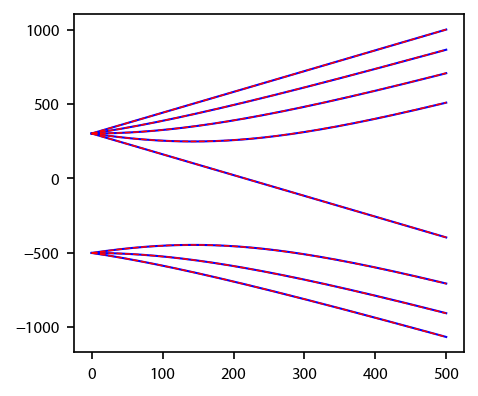

In [4]:
B = np.arange(0, 500, 0.1)

Es = np.zeros((H_g_D2.shape[0], B.shape[0]))
Es2 = np.zeros((H_g_uncoupled.shape[0], B.shape[0]))

for ii, B_i in enumerate(B):
    Es[:, ii] = np.sort(np.linalg.eig(H_g_D2 + mu_q_g_D2[1]*B_i)[0])
    Es2[:, ii] = np.sort(np.linalg.eig(H_g_uncoupled + muq_g_uncoupled[1]*B_i)[0])
    
plt.figure()
plt.plot(B, Es.T, 'b-', linewidth=1.0)
plt.plot(B, Es2.T, 'r--', linewidth=0.75)

Nuclear spin flip at larger field:

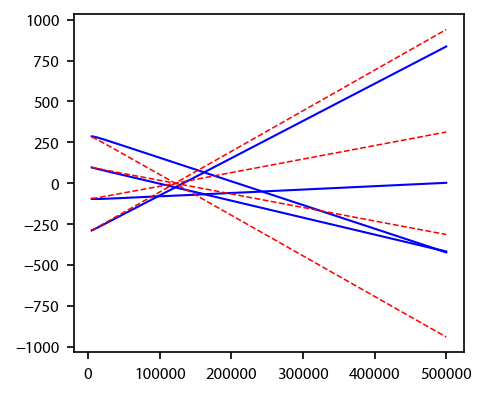

In [5]:
B = np.arange(5000, 500000, 100)

Es = np.zeros((H_g_D2.shape[0], B.shape[0]))
Es2 = np.zeros((H_g_uncoupled.shape[0], B.shape[0]))

for ii, B_i in enumerate(B):
    Es[:, ii] = np.sort(np.linalg.eig(H_g_D2 + mu_q_g_D2[1]*B_i)[0])
    Es2[:, ii] = np.sort(np.linalg.eig(H_g_uncoupled + muq_g_uncoupled[1]*B_i)[0])
    
plt.figure()
plt.plot(B, (Es[4:]-np.mean(Es[4:], axis=0)).T, 'b-', linewidth=1.0)
plt.plot(B, (Es2[4:]-np.mean(Es2[4:], axis=0)).T, 'r--', linewidth=0.75)

### Now let's go to the excited state:

/Users/steve/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


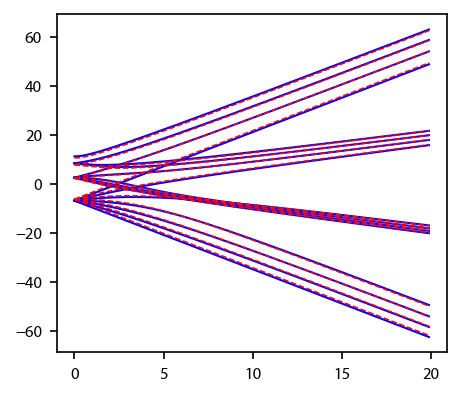

In [6]:
B = np.arange(0, 20, 0.1)

Es = np.zeros((H_e_D2.shape[0], B.shape[0]))
Es2 = np.zeros((H_e_uncoupled.shape[0], B.shape[0]))

for ii, B_i in enumerate(B):
    Es[:, ii] = np.sort(np.linalg.eig(H_e_D2 + mu_q_e_D2[1]*B_i)[0])
    Es2[:, ii] = np.sort(np.linalg.eig(H_e_uncoupled + muq_e_uncoupled[1]*B_i)[0])
    
plt.figure()
plt.plot(B, Es.T, 'b-', linewidth=1.0)
plt.plot(B, Es2[8:].T-xi/2, 'r--', linewidth=0.75)

### Now reproduce Fig. 1:

/Users/steve/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


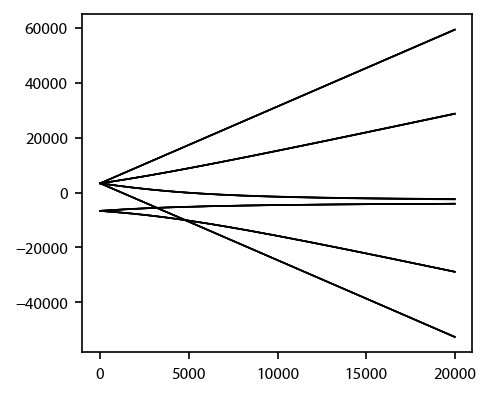

In [7]:
B = np.arange(0, 2e4, 10)

Es_uncoupled = np.zeros((H_e_uncoupled.shape[0], B.shape[0]))

for ii, B_i in enumerate(B):
    Es_uncoupled[:, ii] = np.sort(np.linalg.eig(H_e_uncoupled + muq_e_uncoupled[1]*B_i)[0])
    
plt.figure()
plt.plot(B, Es_uncoupled.T, 'k-', linewidth=0.75)

Now, compute:

### Next, let's look at Fig. 2:

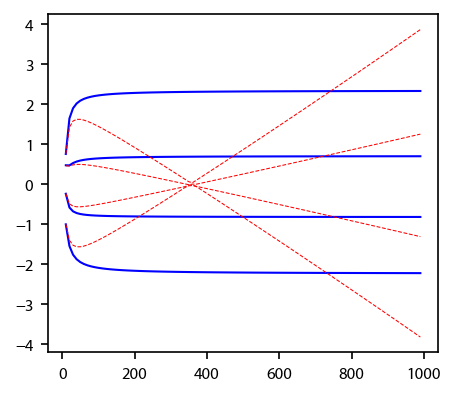

In [8]:
B = np.arange(10, 1000, 10)

Es_coupled = np.zeros((H_e_D2.shape[0], B.shape[0]))
Es_uncoupled = np.zeros((H_e_uncoupled.shape[0], B.shape[0]))

for ii, B_i in enumerate(B):
    Es_coupled[:, ii] = np.sort(np.linalg.eig(H_e_D2 + mu_q_e_D2[1]*B_i)[0])
    Es_uncoupled[:, ii] = np.sort(np.linalg.eig(H_e_uncoupled + muq_e_uncoupled[1]*B_i)[0])
    
fig, ax = plt.subplots(1, 1)
plt.plot(B, (Es_coupled[4:8, :] - np.mean(Es_coupled[4:8, :], axis=0)).T, 'b-', linewidth=1)
plt.plot(B, (Es_uncoupled[12:16, :] - np.mean(Es_uncoupled[12:16, :], axis=0)).T, 'r--', linewidth=0.5)

### It should not matter what direction one applies the field

It should always be the same:

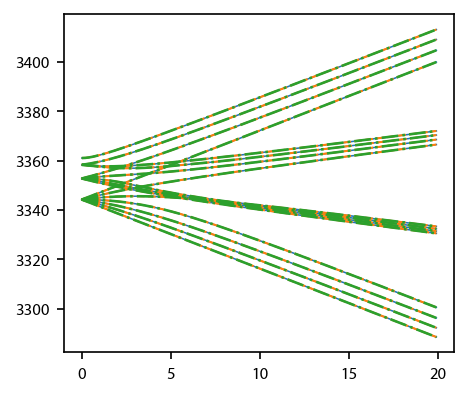

In [9]:
B = np.arange(0, 20, 0.1)

Es_x = np.zeros((B.size, muq_e_uncoupled.shape[1]))
Es_y = np.zeros((B.size, muq_e_uncoupled.shape[1]))
Es_z = np.zeros((B.size, muq_e_uncoupled.shape[1]))

Bq_x = np.zeros((3,),dtype='complex128')
Bq_y = np.zeros((3,),dtype='complex128')
Bq_z = np.zeros((3,),dtype='complex128')

Bq_z[1] = 1

Bq_x[0] = -1/np.sqrt(2)
Bq_x[1] = 0
Bq_x[2] = 1/np.sqrt(2)

Bq_y[0] = +1j/np.sqrt(2)
Bq_y[1] = 0
Bq_y[2] = -1j/np.sqrt(2)

for ii, Bi in enumerate(B):
    Es_x[ii, :], Vecs_x = np.linalg.eigh(
        H_e_uncoupled + Bi*np.tensordot(Bq_x[::-1], muq_e_uncoupled,axes=(0,0))
        )
    Es_y[ii, :], Vecs_y = np.linalg.eigh(
        H_e_uncoupled + Bi*np.tensordot(Bq_y[::-1], muq_e_uncoupled,axes=(0,0))
        )
    Es_z[ii, :], Vecs_z = np.linalg.eigh(
        H_e_uncoupled + Bi*np.tensordot(Bq_z[::-1], muq_e_uncoupled,axes=(0,0))
        )
    
fig, ax = plt.subplots(1, 1)
ax.plot(B, Es_z[:, 8:], color='C0', linewidth=0.75)
ax.plot(B, Es_x[:, 8:], '--', color='C1', linewidth=1.0)
ax.plot(B, Es_y[:, 8:], '-.', color='C2', linewidth=1.25)